### Задача  проекта: Оценка приоритета гипотез и анализ результатов A/B теста

#### Описание проекта:

Приоритезация гипотез и анализ результатов A/B-теста в крупном интернет-магазине.

#### Оглавление:
1. [Шаг 1. Откроем файл с данными и изучим данные](#step1)
2. [Шаг 2. Приоритизация гипотез](#step2)
3. [Шаг 3. Анализ A/B-теста](#step3)

3.1 [Строим график кумулятивной выручки по группам. Делаем выводы и предположения.](#step4)<br>
3.2 [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#step5)<br>
3.4 [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#step6)<br>
3.5 [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения](#step7)<br>
3.6 [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#step8)<br>
3.7 [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#step9)<br>
3.8 [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#step10)<br>
3.9 [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#step11)<br>
3.10 [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#step12)<br>
3.11 [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#step13)<br>
3.12 [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#step14)<br>
3.13 [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#step15)<br>
3.14 [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#step16)<br>
3.15 [Выводы](#step17)<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

<h2> ШАГ 1. Откроем файлы с данными и изучим данные </h2> <a id="step1"></a>

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

pd.set_option('display.max_colwidth',1)

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
#Приведем названия столбцов к нижнему регистру и выведем общую информацию по датафрейму
hypothesis.columns = hypothesis.columns.str.lower().str.replace(' ', '_')
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Всего 9 гипотез. Пропущенных значений нет

In [5]:
#Рассмотрим таблицу orders
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
#Приведем названия столбцов к нижнему регистру и выведем общую информацию по датафрейму
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
#Изучим столбец transactionid
orders['transactionid'].value_counts().reset_index().sort_values('index')

,index,transactionid
1110,1062393,1
514,4919758,1
682,7210578,1
275,8131427,1
1194,11068804,1
...,...,...
1160,4276811111,1
546,4279408906,1
391,4281129020,1
1086,4288552432,1


Уникальный номер transactionId встречается только один раз. Всего 1197 транзакций было совершено

In [8]:
#Изучим столбец visitorid
orders['visitorid'].value_counts().reset_index().sort_values('visitorid')

,index,visitorid
515,1476256851,1
678,2710478747,1
679,4144979507,1
680,3283584911,1
681,3166175118,1
...,...,...
6,199603092,5
3,2038680547,8
2,2378935119,9
1,2458001652,11


Всего 1031 уникальный посетитель. Некоторые из них совершают более одной покупки.

In [9]:
#Приведем столбец date к типу datetime и посмотрим его разброс
orders['date'] = pd.to_datetime(orders['date'])
orders['date'].describe()

count     1197               
unique    31                 
top       2019-08-05 00:00:00
freq      48                 
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Данные приведены за 1 календарный месяц: с 01 по 31 августа 2019 года

In [10]:
#Изучим столбец revenue

print('Минимальна сумма заказа:', orders['revenue'].min())
print('Максимальная сумма заказа:', orders['revenue'].max())
print('Общая сумма заказов:', orders['revenue'].sum())

Минимальна сумма заказа: 50
Максимальная сумма заказа: 1294500
Общая сумма заказов: 9992563


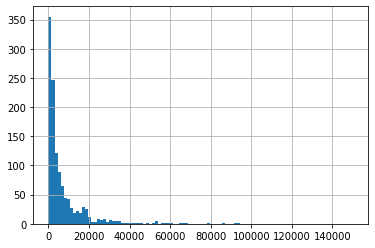

In [11]:
#Посмотрим распределение
orders['revenue'].hist(range=(0, 150000), bins=100)

Основное количество заказов приходится на сумму до 20 000 рублей

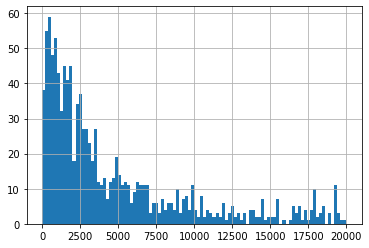

In [12]:
orders['revenue'].hist(range=(0, 20000), bins=100)

In [13]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [14]:
#изучим датафрейм visitors
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors['date'].describe()

count     62                 
unique    31                 
top       2019-08-02 00:00:00
freq      2                  
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

даты, приведенные в датафрейме Visitors соврпадают с датами в датафрейму Orders

In [17]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Данные по обоим группам есть за все дни

In [18]:
visitors['visitors'].describe()

count    62.000000 
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

In [19]:
#Посмотрим количество посетителей в группах
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [20]:
((visitors.groupby('group')['visitors'].sum().loc['B']  - visitors.groupby('group')['visitors'].sum().loc['A']) / visitors.groupby('group')['visitors'].sum().loc['B'] * 100).round(2)

0.95

Количество посетителей различается на 0.95%, что нас усраивает

### <h2>ШАГ 2. Приоритизация гипотез.</h2> <a id="step2"></a>

<h4>Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</h4>

In [21]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5




Формулы для рассчета приоритезации гипотез

<br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$


In [22]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] /  hypothesis['efforts']).round(2)
hypothesis.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


По методике приоретизации гипотез ICE, самой приоритетной гипотезой является запуск акции в день рождения. Гипотеза с самым низким приритетом - " Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	"

<h4>Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</h4>


In [23]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] /  hypothesis['efforts']).round(2)
hypothesis.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


По методу приоритезации гипотез гипотезой с самым низским приоритетом так и осталась гипотеза "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	"
А самой приоритетной гипотезой стала гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	"

<h4>Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.</4>

При применении RICE те гипотезы, которые были наиболее приоритетны при оценке по методологии ICE отошли на 2-ое место, так как большое влияние на итоговую оценку оказал параметр охвата. 
При применении ICE приоритетной гипотезой была Акция в честь дня рождения. Но она не учитывала низкий параметр охвата, хотя у нее и самый большие показатели по влиянию и увереннорсти в гипотезе: "скидки все любят". При применении параметра охвата в оценке гипотез по методолгии RICE параметр охвата силоьно изменил приоритизацию.

<h2>Шаг 3. Анализ A/B-теста</h2> <a id="step3"></a>

### Строим график кумулятивной выручки по группам. Делаем выводы и предположения. <a id="step4"></a>

In [24]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [25]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [27]:
#Агрегируем значения. Вычислим максимальную дату. Для группы рассчитаем максимум, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей.
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group'] == x['group'])]\
                    .agg({'date':'max', 'group':'max', 
                          'transactionid':pd.Series.nunique, 
                          'visitorid':pd.Series.nunique, 
                          'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']))
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [28]:
#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                               visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [29]:
#Объединим обе таблицы в одной
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


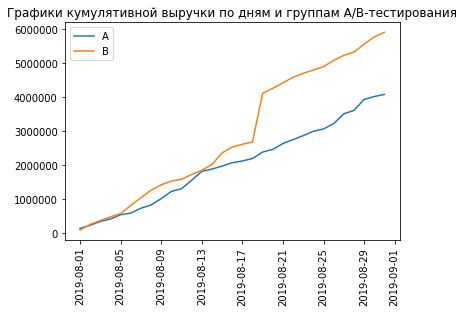

In [30]:
#Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования')
plt.legend()
plt.xticks(rotation='vertical');

Выручка почти равномерно увеличивается в течение всего теста.
Однако график выручки группы B резко растет c 18 на 19 число. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.


<h4>Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.</h4><a id="step5"></a>

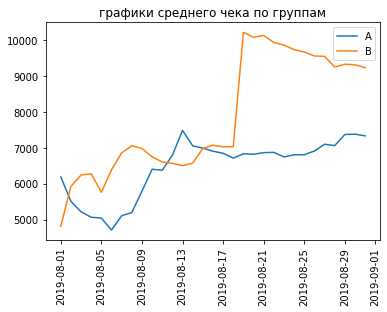

In [31]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('графики среднего чека по группам')
plt.xticks(rotation='vertical');

Проведя анализ среднего чека, видно, что в группе В резкот вырос средний чек, который в дальнейшем остался достаточно выше, чем в группе А. Однако средний чек группы А продолжает планый рост, в то время, как чек группы В начал падать.

<h4>Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.</h4><a id="step6"></a>

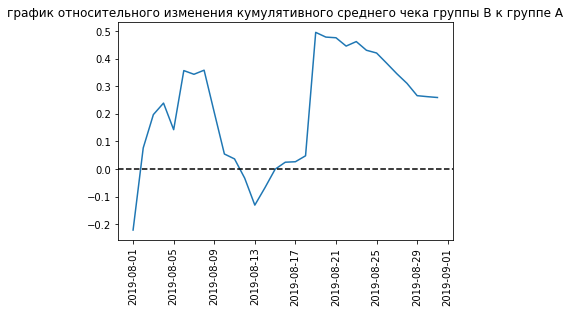

In [32]:
#Соберем данные на одном графике
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation='vertical');



На графике замечены резкие скачки и падения. Были крупные заказы.

<h4>Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.</h4><a id="step7"></a>

''

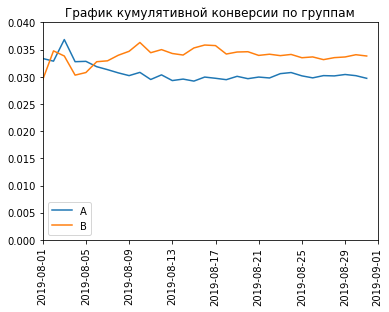

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
 
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
 
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
 
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation='vertical')
plt.axis(["2019-08-01", '2019-09-01', 0, 0.04])
;



Конверсия была нестабильна в пеервые дни теста, затем конверсия групп В возрасла, конверсия группы А упала. Разница между конверсиями сильно различается. тем не менее конверсия обоих групп продолжает "скакать"

<h4>Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.</h4><a id="step8"></a>

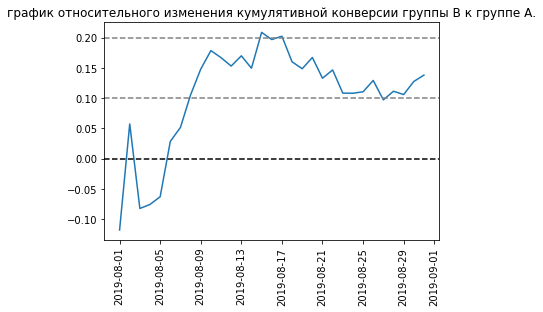

In [34]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                                .merge(cumulativeDataB[['date','conversion']], 
                                       left_on='date', 
                                       right_on='date', 
                                       how='left', 
                                       suffixes=['A', 'B']))

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.xticks(rotation='vertical')
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A.')
 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')


В начале теста группа B значительно проигрывала группе A, затем начался стремительный рост. Потом её конверсия снова начала падать, но под конец начался рост.
Отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 
Стоит проанализировать аномалии, возможно, они изменят картину.


<h4>Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.</h4><a id="step9"></a>

In [35]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                        .groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique}))
ordersByUsers.columns = ['userId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 11, 9, 8 заказов за месяц.
Построим гистрограмму распределения количества заказов на одного пользователя.

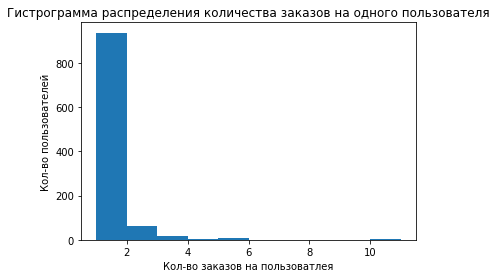

In [36]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.xlabel('Кол-во заказов на пользоватлея')
plt.ylabel('Кол-во пользователей');


Большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна.

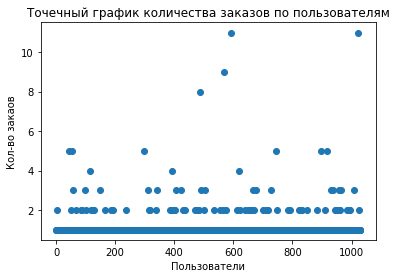

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во закаов');

Выводы подтверждаются: много пользователей с 2 и 3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

<h4>Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.</h4><a id="step10"></a>

In [38]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более 4 раз.
Выберем 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. У

<h4>Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.</h4><a id="step11"></a>

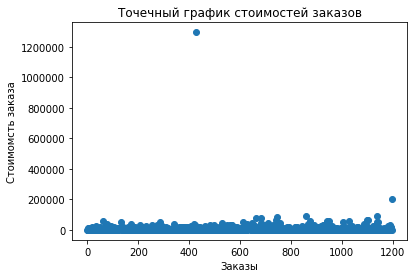

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимомсть заказа');

Дорогих заказов крайне мало, но, тем неменее они есть, и они сильно отличаются. Выведем 5% и 1% перцентиль для определения нижней границы стоимости заказа. 

<h4>Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.</h4><a id="step12"></a>

In [40]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233. За нижнюю границу определим стоимость заказа в 28 000 рублей, так как разница значительна.

<h4>Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.</h4><a id="step13"></a>

In [41]:
#создадим таблицу и посетителями группы А и группы Б по дням
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


In [42]:
#Создадим таблицу с куммулятивными данными по посетителям группы А и группы В
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [43]:
# Из таблицы с заказами оставим данные для посетителей группы А, подсчитаем ол-во заказов на каждую дату и их сумму.
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#из получившейся таблицы соберем куммулятивные данные


ordersACummulative = ordersADaily.apply(
    lambda x: 
        ordersADaily[ordersADaily['date'] <= x['date']]
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917
5,2019-08-06,127,598401
6,2019-08-07,145,740818
7,2019-08-08,161,837097
8,2019-08-09,177,1025603
9,2019-08-10,193,1236098


In [44]:
#Аналогично построим таблицу с куииулятивными данными для покупателей из группы В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

ordersBCummulative

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995
5,2019-08-06,129,824337
6,2019-08-07,153,1049671
7,2019-08-08,180,1270589
8,2019-08-09,205,1431401
9,2019-08-10,228,1539203


In [45]:
#Объединим получившиеся таблицы
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
                    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
                    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
                    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
                    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
                    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
                    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [46]:
#Посчитаем статистическую значимость различия в конверсии между группами.
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [47]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
                               , name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders']
                     ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
                                , name='orders')],axis=0)

Выдвенем нулевую и альтернативную гипотезу для проверки статистической значимости различий конверсии между группами по "сырым" данным:

H0: статистически значимых различий в конверсии между группами нет;

H1: между группами существует статистически значимая конверсия;

In [48]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


0.008
0.138


p-value меньше 0.05, потому нулевую гипотезу отвергаем.
Анализ сырых данных показывает, что между группами есть статичтически значимые различия. Относительный прирост конверсии группы В к группа А равен 13.8%

<h4>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.</h4><a id="step14"></a>

Выдвенем нулевую и альтернативную гипотезу для проверки статистической значимости различий в среднем чеке закаща между группами по "сырым данным":

H0: статистически значимых различий в среднем чеке между группами нет;

H1: между группами существует статистически значимая разница в среднем чеке;

In [49]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                    orders[orders['group']=='B']['revenue'])[1]))

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()
                       /orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего группы В по отношению к группе А составляет 25,9%, что довольно много.

<h4>Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.</h4><a id="step15"></a>

На предыдущем шаге мы опрелили за нижнюю границу:

- стоимость заказа в 28 000 рублей;


- 3 заказа на одного пользователя;

Узнаем, сколько всего аномальных пользователей

In [50]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)\
                            .drop_duplicates().sort_values()

abnormalUsers.shape



(63,)

Всего 63 аномальных пользователя.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

Выдвенем нулевую и альтернативную гипотезу для проверки статистической значимости различий в среднем чеке закаща между группами по "очищенным" данным:

H0: статистически значимых различий в конверсии между группами нет;

H1: между группами существует статистически значимая разинца в конверсия;

In [51]:
#подготовим очищенные выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                                          - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                                                          - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)

#выведем p-value для сравнения конверсии между очищенными группами
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

#выведем относительный прирост конверсии очищенной группы B,
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.00897
0.148


Результаты по конверсии практически не изменились. 

p-value меньше 0.05, анализ очищенных данных показывает, что между группами есть статичтически значимые различия. Относительный прирост конверсии группы В к группа А равен 14.8%

<h4>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.</h4><a id="step16"></a>

Выдвенем нулевую и альтернативную гипотезу для проверки статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным:

H0: статистически значимых различий в среднем чеке между группами нет;

H1: между группами существует статистически значимая разница в среднем чеке;

In [52]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.488
-0.017


P-value увеличился, что говорит о том, что после очистки данных причин считать, что разница между чеками есть стало еще меньше. Разница между сегментами сократилась с 25.9% до -1.7%. 
После очистки данных средний чек группы А стал больше. 

<h4>Выводы</4><a id="step17"></a>


Достигнута статистически значимое различие по конверсии между группами и по «сырым», ии по данным после фильтрации аномалий;

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

График различия конверсии между группами сообщает, что результаты группы B на текущий момент лучше группы A на 15%  и продолжают улучшаться; 

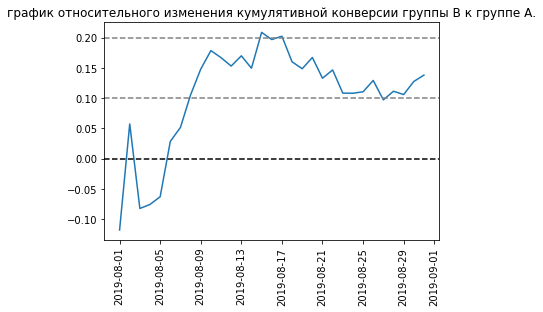

In [53]:
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.xticks(rotation='vertical')
plt.title('график относительного изменения кумулятивной конверсии группы B к группе A.')
 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

График различия среднего чека говорит о том, что результаты группы B лучше. Отображеная на графике прямая показывает данные с выбросами. После очистки, результаты группы А стали лучше на 1.7% , но статистически значимой разницы не достигнуто. Отличие небольшое, не является критичным для принятия решеия о том, что средний чек группы В, ниже, группы А.

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

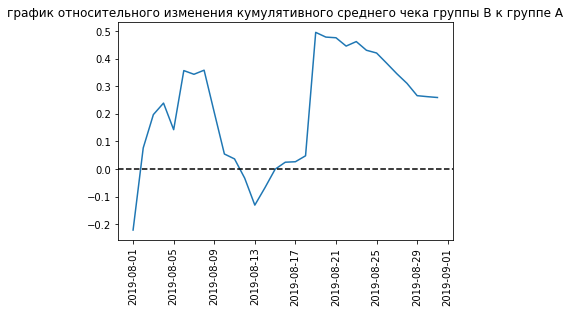

In [54]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation='vertical')

Так как результаты не стабильны, хотя и есть сильное отличие группы В, считаю целесмообразными продолжить тест до стабилизации результатов.